# Final Analysis of Results

## Initial setup of Python libraries

In [1]:
import pandas as pd
import numpy as np
import string
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import pickle
import os
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from collections import Counter
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
from wordcloud import WordCloud
%matplotlib inline

def clean_text(text):
    # Remove special characters and punctuation, but preserve whole words
    cleaned = re.sub(r'[^\w\s]', '', text)  # Remove punctuation (except spaces and words)
    cleaned = cleaned.lower()  # Convert to lowercase
    return cleaned

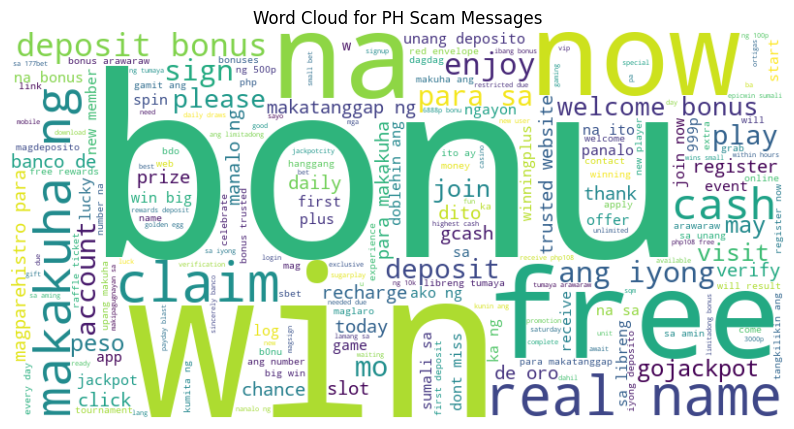

In [4]:
# Load the original PH scam dataset
original_data = pd.read_csv('Datasets/PH_SPAM.csv')

# Replace '\n' with spaces first
original_data['text'] = original_data['text'].str.replace('\n', ' ', regex=True)

# Apply the clean_text function
original_data['text'] = original_data['text'].dropna().apply(clean_text)

# Combine all text into a single string
text_combined = " ".join(original_data['text'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_combined)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for PH Scam Messages")
plt.show()

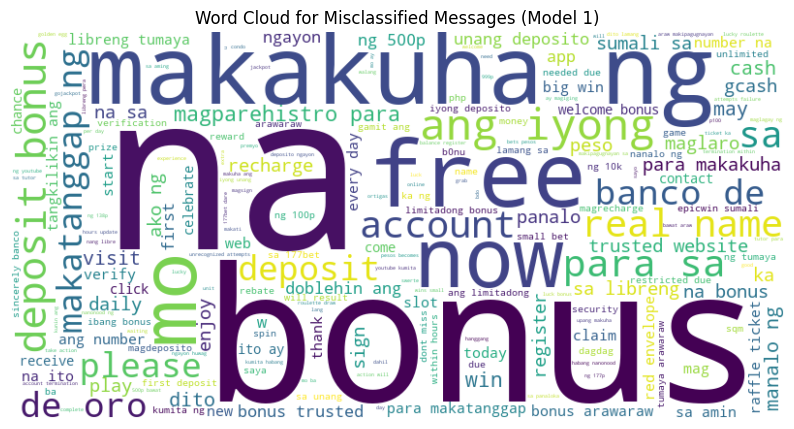

In [5]:
# Load Model 1 misclassifications
misclassified_model1 = pd.read_csv('Datasets/misclassified_model1.csv')

# Combine misclassified text
text_model1 = " ".join(misclassified_model1['text'].dropna())

# Generate and display word cloud
wordcloud_model1 = WordCloud(width=800, height=400, background_color='white').generate(text_model1)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_model1, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Misclassified Messages (Model 1)")
plt.show()

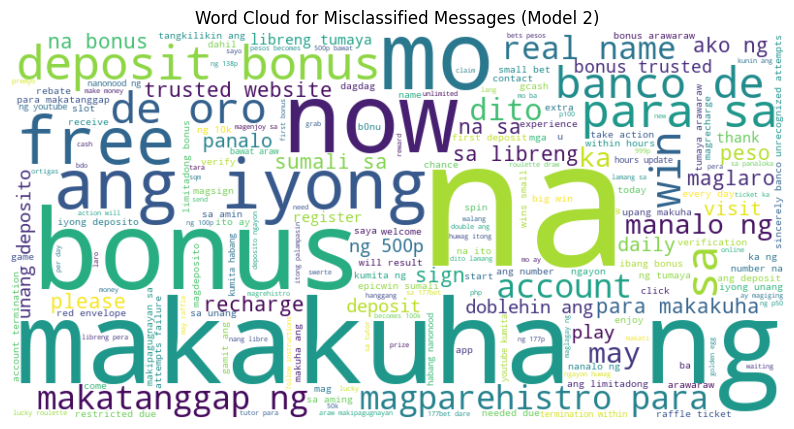

In [7]:
# Load Model 2 misclassifications
misclassified_model2 = pd.read_csv('Datasets/misclassified_model2.csv')

# Combine misclassified text
text_model2 = " ".join(misclassified_model2['text'].dropna())

# Generate and display word cloud
wordcloud_model2 = WordCloud(width=800, height=400, background_color='white').generate(text_model2)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_model2, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Misclassified Messages (Model 2)")
plt.show()

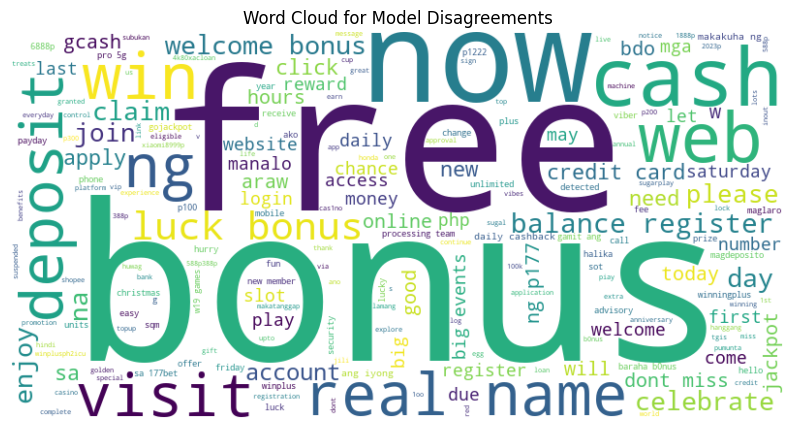

In [9]:
# Load model disagreements
disagreements = pd.read_csv('Datasets/model_disagreements.csv')

# Combine disagreement text
text_disagreements = " ".join(disagreements['text'].dropna())

# Generate and display word cloud
wordcloud_disagreements = WordCloud(width=800, height=400, background_color='white').generate(text_disagreements)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_disagreements, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Model Disagreements")
plt.show()

In [10]:
from collections import Counter

# Tokenize and clean disagreement messages
all_words = " ".join(disagreements['text'].dropna()).split()
word_freq = Counter(all_words)

# Display top 10 most common words
print("Top 10 Most Frequent Words in Disagreements:")
print(word_freq.most_common(10))

Top 10 Most Frequent Words in Disagreements:
[('bonus', 51), ('at', 44), ('to', 43), ('your', 38), ('get', 34), ('and', 30), ('for', 30), ('free', 25), ('on', 23), ('the', 21)]
